# #1 통계

## 무작위성 검정

A 쇼핑몰은 새로운 브랜드 런칭 이벤트를 지원하기 위하여 매장 방문 고객에게 상품 1만원권을 배포하였다. 매장 오픈 후 최초 20명의 방문이력을 조사한 결과 아래의 순서로 멤버십을 소지한 사람(1)과 소지하지 않은 사람(0)이 방문하였다. A 쇼핑몰의 CRM 팀에서는 이러한 마케팅 행사가 한쪽에 치우치지 않고 공정하게 이루어졌는지를 판단하기 위해 무작위성 검정을 진행하고자 한다. 

**1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0** 

이 문제를 위한 가설을 설정하고 검정하시오.

In [3]:
from statsmodels.sandbox.stats.runs import Runs
import numpy as np
x = [1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0]
x = np.array(x)

#2. RUN 검정 분석
Runs(x).runs_test()

(-1.8277470669267506, 0.06758752074917526)

H0 (귀무가설)= 멤버십 소지 고객과 비소지 고객의 방문은 무작위로 이루어졌다.

H1 (연구가설)= 멤버십 소지 고객과 비소지 고객의 방문은 무작위로 이루어지지 않았다.

유의 수준 5% 에서 검정 결과 P value가 0.067 이기 때문에 귀무가설을 채택

즉 멤버십 소지 고객과 비소지 고객의 방문은 무작위로 이루어졌다. 공정하게 이루어 졌다


## 두 변수의 비교

A 쇼핑 마케팅 팀에서는 새로운 로열티 프로그램을 제공하며 멤버십 기능을 강화하였다. 로열티 프로그램 만족도의 변화가 통계적으로 유의한 지 알아보기 위해 도입 전과 후의 고객만족도에 대한 검정을 수행하고자 한다.

**사용데이터 : Ashopping.csv    **
- encoding="CP949" 

이 문제를 위한 가설을 설정하고 검정하시오.

In [130]:
import pandas as pd
import numpy as np

data = pd.read_csv('./Ashopping.csv', encoding="CP949")
data.head()

,고객ID,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도
0,1,5,7
1,2,2,3
2,3,6,6
3,4,3,5
4,5,5,6


In [135]:
from scipy.stats import ttest_1samp, ttest_rel
ttest_1samp(data['멤버쉽_프로그램_가입후_만족도'] - data['멤버쉽_프로그램_가입전_만족도'],0)

Ttest_1sampResult(statistic=29.560410783358122, pvalue=1.7319140513197275e-138)

귀무가설 : 도입전과 후에 차이가 없다.

연구가설 : 도입전과 후에 차이가 있다.

유의수준 5%에서 검정 결과 pvalue 가 0에 가까워서 귀무가설 기각 

즉 도입전과 후에 차이가 있다.

In [136]:
way2 = ttest_rel(data['멤버쉽_프로그램_가입후_만족도'], data['멤버쉽_프로그램_가입전_만족도']) 
print(way2)


Ttest_relResult(statistic=29.560410783358122, pvalue=1.7319140513197275e-138)


전자회사 C사는 기존의 물류 알고리즘보다 개선되었다고 알려진 새로운 물류 경로 최적화 알고리즘을 도입해 상품의 배송시간을 단축하고자 한다. 이에 전국 7개의 물류센터에 실험적으로 적용해보고 실제로 얼마나 더 나은 성과를 보이는지 검증해보고자 한다. 전국 7개의 물류센터에서 새로운 알고리즘의 적용 전 평균 배송시간과 적용 후의 평균 배송시간은 다음과 같다. 

|물류센터|기존 알고리즘|신규 알고리즘|
|---|---|---|
|1|10|8|
|2|30|27|
|3|9|16|
|4|21|25|
|5|35|30|
|6|12|13|
|7|17|11|

이 문제를 위한 가설을 설정하고 검정하시오.

In [16]:
import numpy as np
from scipy.stats import ttest_1samp, wilcoxon

old = np.array([10,30,9,21,35,12,17])
new = np.array([8,27,16,25,30,13,11])

way1 = wilcoxon(old - new)
way1

WilcoxonResult(statistic=12.0, pvalue=0.8125)

Wilcoxon 부호 있는 순위 검정(paired t-test의 대안법)

두 모집단이 독립이 아니라 일대 일로 대응되는 경우, 두 모집단 중앙값의 차이에 대한 비모수적 검정방법 으로 Wilcoxon 부호있는 순위 검정을 사용한다

이 방법은 쌍체(pairwise) t-검정에 대응 하는 비모수적 방법이다. 두 모집단으로부터 n개의 자료쌍을 추출하여 각 쌍의 절댓값을 취하고 차이가 0인 경우는 제외하고 차이의 절댓값 오름차순으로 순위를 부여한다. 동일한 값이 나오면 순위의 평균을 부여한다.

귀무 가설 : 기존 물류 알고리즘과 신규 알고리즘간을 통한 평균 배송시간은 차이가 없다.

연구가설 : 기존 물류 알고리즘과 신규 알고리즘간을 통한 평균 배송시간은 차이가 있다.

## 세 변수의 비교

A 쇼핑에서는 VIP 고객들을 대상으로 새로운 혜택을 제공하고자 한다. 샘플증정, 포인트 추가, 무료배송, 할인쿠폰 등 4가지 혜택에 대한 5개 지역별 고객들에 대한 사전 선호도 조사를 실시한 결과 지역별 서비스에 대한 서열은 아래 표와 같이 정리되었다. 혜택 별 고객 선호도에 차이가 있는지를 검정을 통해 알아보자. 

|지역|샘플증정|포인트추가|무료배송|할인쿠폰|
|---|---|---|---|---|
|서울경기|1|3|2|4|
|강원|2|3|4|1|
|충청|1|3|4|2|
|경상|1|2|4|3|
|전라|2|1|3|4|

이 문제를 위한 가설을 설정하고 검정하시오.

## Friedman 검정(이원분산 분석 비모수)

1. Kruskal-Wallis 검정의 확장으로서, 이원배치법 실험에서 얻어진 자료를 비모수적인 방법으로 검정

    그렇다면 이원 배치법이 무엇이냐.. 독립변수 2개에 종속변수가 한개인 집단 편균간 차이를 검정 하는 방법이지..

    여기에서 종속변수가 정규분포를 가정할때는 이원배치법을 사용하고, 정규성을 만족 안하거나, 관측치가 작을경우 비모수 방법인

    Friedman 을 사용
    
2. One way Repeated measures Anova 비모수 분석 방법
    One way RM Anova 란 Paired t test의 확장으로써, 동일 개체에 대해서 시간의 흐름 또는 반복으로 측정한 자료를 검정 한 분석 방법

In [92]:
import pandas as pd
import numpy as np
a = [1,2,1,1,2]
b = [3,3,3,2,1]
c = [2,4,4,4,3]
d = [4,1,2,3,4]

area = ['서울경기','강원','충청','경상','전라']

data = pd.DataFrame({'지역':area, '샘플증정':a,'포인트추가':b,'무료배송':c,'할인쿠폰':d})

data_T = data.set_index('지역').T

display(data_T.head())

data_melt = pd.melt(data,id_vars=['지역'])

data_melt.head()

지역,서울경기,강원,충청,경상,전라
샘플증정,1,2,1,1,2
포인트추가,3,3,3,2,1
무료배송,2,4,4,4,3
할인쿠폰,4,1,2,3,4


,지역,variable,value
0,서울경기,샘플증정,1
1,강원,샘플증정,2
2,충청,샘플증정,1
3,경상,샘플증정,1
4,전라,샘플증정,2


In [42]:
data_melt_group = data_melt.groupby(['지역','variable']).agg(['count','mean','median'])
data_melt_group.columns = ['count', 'mean', 'median']
data_melt_group = data_melt_group.reset_index()
data_melt_group.head()

,지역,variable,count,mean,median
0,강원,무료배송,1,4,4
1,강원,샘플증정,1,2,2
2,강원,포인트추가,1,3,3
3,강원,할인쿠폰,1,1,1
4,경상,무료배송,1,4,4


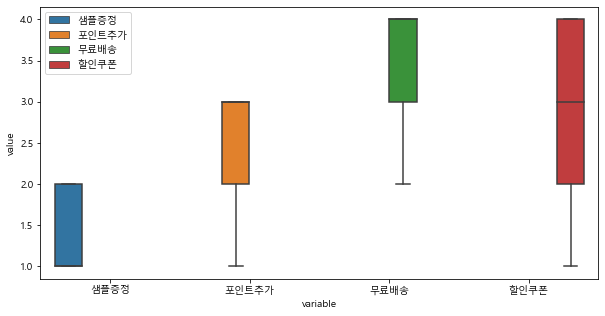

In [69]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=data_melt, x="variable", y="value", hue=data_melt['variable'].tolist() )
plt.show()

In [73]:
from scipy.stats import friedmanchisquare
friedmanchisquare(a, b, c, d)

FriedmanchisquareResult(statistic=6.359999999999999, pvalue=0.09535032301698126)

### pingouin friedman  패키지 사용법

data : Dataframe (wide or long format)

dv : Name of column in dataframe that contains dependent variable(종속변수)

within : Name of column in dataframe that contains within-subject factor (treatment)

subject : Name of column in dataframe that contains subjects (block)

In [99]:
import pingouin as pg
pg.friedman(data=data_melt, dv="value", within="variable", subject="지역")

,Source,W,ddof1,Q,p-unc
Friedman,variable,0.424,3,6.36,0.09535


<font size="5"> P value 가 0.09535이기 때문에 귀무가설 기각 혜택별 고객 선호도 차이가 없다</font>

### Friedman 사후 검정

In [101]:
import scikit_posthocs as sp
sp.posthoc_conover_friedman(a=data_melt, y_col="value", group_col="variable", block_col="지역", 
                                 p_adjust="fdr_bh", melted=True)

,샘플증정,포인트추가,무료배송,할인쿠폰
샘플증정,1.000000,0.386622,0.209966,0.366296
포인트추가,0.386622,1.000000,0.386622,0.643128
무료배송,0.209966,0.386622,1.000000,0.587442
할인쿠폰,0.366296,0.643128,0.587442,1.000000


공장 종류(A,B,C,D)에 따라서 공장 설비(높이, 캐노피 면적)에 차이가 발생하는 지 알아보자.

In [108]:
#해당 코드를 실행하면 데이터가 로드됩니다. 

# df=pd.read_csv("https://reneshbedre.github.io/assets/posts/ancova/manova_data.csv")
df=pd.read_csv("./manova_data.csv")
df.head()

,plant_var,height,canopy_vol
0,A,20.0,0.70
1,A,22.0,0.80
2,A,24.0,0.95
3,A,18.0,0.60
4,A,20.0,0.74


# 다변량 분산 분석(MANOVA)

다변량 분산분석(MANOVA:Multivariate  Analysis of Variance)은 단일별량분산분석과 달리 종속변수가 2개 이상인 경우 집단간의 평균차이를 비교하기 위한 분석 기법이다.  

즉, 다수의 종속변수들에서 집단 간의 차이가 있는지를 검증하는 기법이다. MANOVA는 종속변수끼리 서로 약한 상관관계가 있을 때 사용하는 모델이지만, 강한 상관관계가 있다면 다중공선성의 위험성이 있다. 종속변수가 많지만 서로 독립이라면 종속변수의 개수만큼 ANOVA 분석을 실시하면 된다.

다변량 분산 분석 기본가정
 - 관측값이 서로 독립적이다
 - 모든 종속변수가 다변량의 정규분포를 따른다.  
     - Mardia 방법, Henze-Zirkler 방법, Royston 방법, Doornik-Hansen’s MVN test
     - 여기에서는 Henze-Zirkler 방법수행
     - *참고) 다변량 중심 극한 정리에 따라 독립 변수와 종속 변수의 각 조합에 대해 표본 크기가 큰 경우(예: n > 20) 다변량 정규성을 가정할 수 있습니다.
 - 각 집단의 분산 공분산 행렬이 동일하다   
     - Box's m 검정 사용
     - Box's m 두개 이상의 집단에 공변량 행렬이 동질한지 여부를 판단. 단점은 정규성에 상당히 민감
     - 기본적인 테스트 검정 가정은 데이터는 다변량 정규를 따른다 이다. 그래서 표본이 정규성 가정을 충족하지 않은 경우 이 검정을 사용하면 안된다. 
     - 소표본에서 검정력이 상당히 낮다 
     - 때문에 유의 수준이 a 값이 0.001이다. 
     
 - 종속변수들 간의 상관정도가 너무 낮거나 높지 않아야 한다
     - 종속변수들 간의 상관계수를 구한다.
     
***      


 - H0 (귀무가설)= 공장 종류에 따른 높이와 캐노피 면적이 차이가 없다.  
    
 - H1 (연구가설)= 공장 종류에 따른 높이와 캐노피 면적이 차이가 있다.


In [109]:
df['height'].corr(df['canopy_vol'])

0.8652547729368811

<AxesSubplot:xlabel='height', ylabel='canopy_vol'>

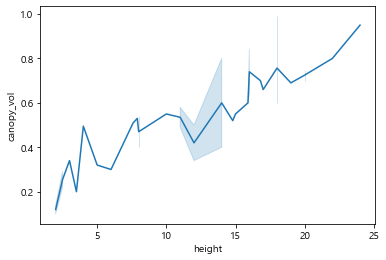

In [110]:
sns.lineplot(x='height', y='canopy_vol', data=df)

이 문제를 위한 가설을 설정하고 검정하시오.

In [112]:
#import necessary packages
from pingouin import multivariate_normality
import pandas as pd
import numpy as np

'''
1. 다변량 정규분포를 따르지 않는다
'''
#perform the Henze-Zirkler Multivariate Normality Test
multivariate_normality(df[['height','canopy_vol']], alpha=.05)

HZResults(hz=1.2881588069652972, pval=0.002947756484661052, normal=False)

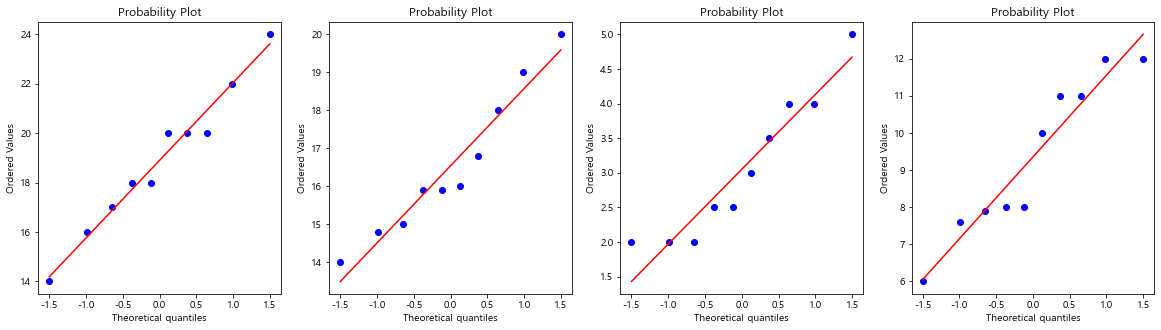

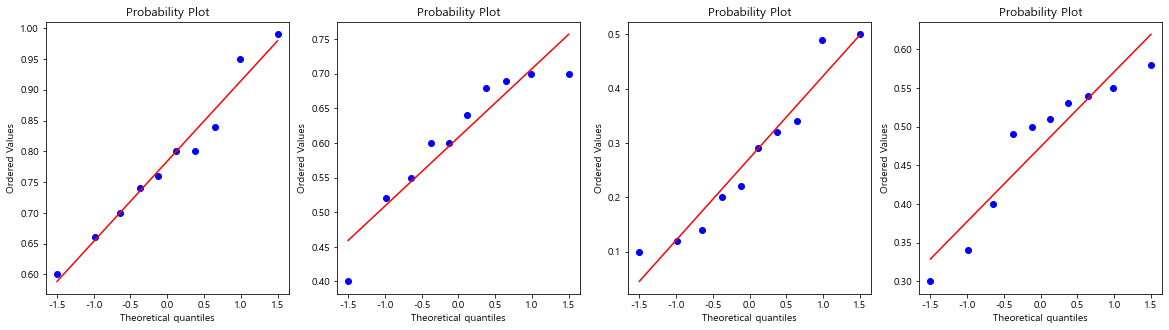

In [114]:
from scipy import stats
groupd = df.groupby('plant_var')
fig = plt.figure(figsize=(20,5))

for i, group in enumerate(groupd):
    ax1 = fig.add_subplot(1,len(groupd),i+1)
    stats.probplot(group[1]['height'], dist=stats.norm, plot=ax1)
plt.show()

fig = plt.figure(figsize=(20,5))
for i, group in enumerate(groupd):
    ax1 = fig.add_subplot(1,len(groupd),i+1)
    stats.probplot(group[1]['canopy_vol'], dist=stats.norm, plot=ax1)    
    

In [119]:
'''
각 집단의 분산 공분산 행렬이 동일하다
'''
import pingouin as pg
pg.box_m(df, dvs=['height', 'canopy_vol'], group='plant_var')

,Chi2,df,pval,equal_cov
box,21.048003,9.0,0.012439,True


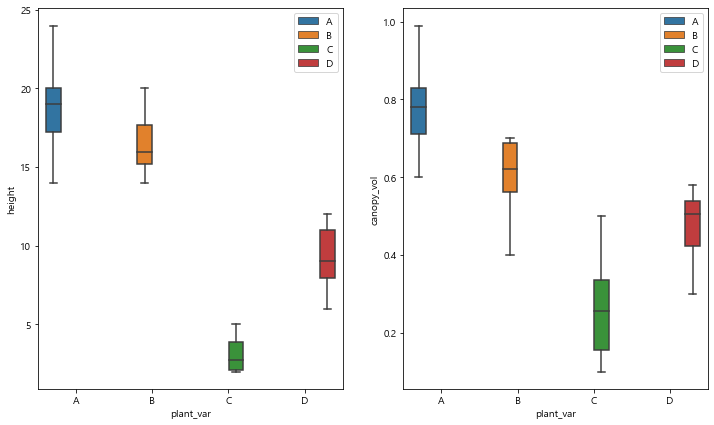

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 7]
fig, axs = plt.subplots(ncols=2)
sns.boxplot(data=df, x="plant_var", y="height", hue=df.plant_var.tolist(), 
            ax=axs[0])

sns.boxplot(data=df, x="plant_var", y="canopy_vol", hue=df.plant_var.tolist(), 
            ax=axs[1])
plt.show()

In [121]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('height + canopy_vol ~ plant_var', data=df)
print(fit.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0374 2.0000 35.0000 450.0766 0.0000
         Pillai's trace  0.9626 2.0000 35.0000 450.0766 0.0000
 Hotelling-Lawley trace 25.7187 2.0000 35.0000 450.0766 0.0000
    Roy's greatest root 25.7187 2.0000 35.0000 450.0766 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
       plant_var         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0797 6.0000 70.0000  29.6513 0.0000
         Pillai's trace  1.0365 6.0000 72.0000  12.9093 0.0000
 Hotelling-

<font size="5"> 공장 종류에 따른 높이와 캐노피 면적이 차이가 통계적으로 유의한 연관성이 있음</font>    

## 다변량 분산분석 사후 분석

In [138]:
import scikit_posthocs
import numpy as np
print(np.round(scikit_posthocs.posthoc_scheffe(df, val_col='height', 
                                group_col='plant_var', sort=True),3))
print("---" * 20)
print(np.round(scikit_posthocs.posthoc_scheffe(df, val_col='canopy_vol', 
                                group_col='plant_var', sort=True),3))
print("---" * 20)
print(pd.pivot_table(df, index='plant_var', values='height', 
                                         aggfunc=np.mean))
print("---" * 20)
print(pd.pivot_table(df, index='plant_var', values='canopy_vol', 
                                         aggfunc=np.mean))
print("---" * 20)

       A      B    C    D
A  1.000  0.118  0.0  0.0
B  0.118  1.000  0.0  0.0
C  0.000  0.000  1.0  0.0
D  0.000  0.000  0.0  1.0
------------------------------------------------------------
       A      B      C      D
A  1.000  0.017  0.000  0.000
B  0.017  1.000  0.000  0.101
C  0.000  0.000  1.000  0.005
D  0.000  0.101  0.005  1.000
------------------------------------------------------------
           height
plant_var        
A           18.90
B           16.54
C            3.05
D            9.35
------------------------------------------------------------
           canopy_vol
plant_var            
A               0.784
B               0.608
C               0.272
D               0.474
------------------------------------------------------------


# 선형 판별 분석을 통한 시각화

선형판별분석(Linear Discriminant Analysis, LDA)는 PCA와 마찬가지로 축소 방법 중 하나이다  
LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간으로 투영(project)해 차원을 축소하는 기법이지만, PCA와 다르게 LDA는 지도학습의 분류(Classification)에서 사용된다.

- LDA 원리  
PCA는 데이터의 변동성이 최대가 되는 축을 찾아 주성분으로 정했지만, LDA는 데이터의 Target값 클래스끼리 최대한 분리할 수 있는 축을 찾을 수 있다.

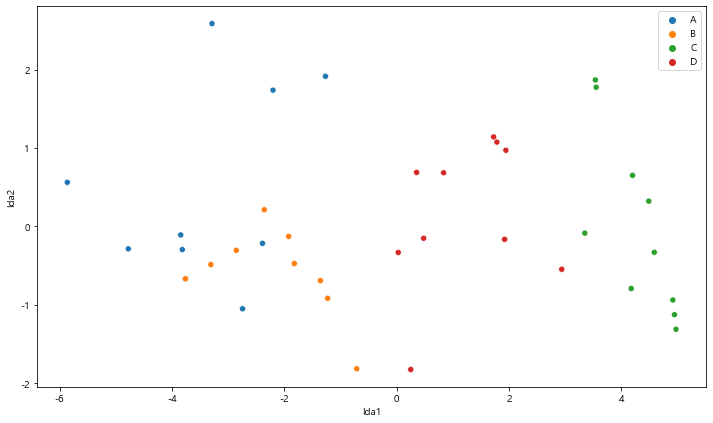

In [139]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
X = df[["height", "canopy_vol"]]
y = df["plant_var"]
post_hoc = lda().fit(X=X, y=y)
X_new = pd.DataFrame(lda().fit(X=X, y=y).transform(X), 
                                     columns=["lda1", "lda2"])
X_new["plant_var"] = df["plant_var"]
sns.scatterplot(data=X_new, x="lda1", y="lda2", hue=df.plant_var.tolist())
plt.show()


<font size="4"><결론></font>

LDA Scatterplot는 두개의 종속 변수를 기반으로 품종을 구별하는데.. C, D 식물 품종은 A,B에 비해 잘 분리가 되어 있다.

A 및 B 식물 품종은 서로 더 유사하다.

# #2 기계학습

사용 데이터 : creditcard.csv  
데이터 출처 : 
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

제시된 데이터는 심한 불균형 형태를 띠고 있다.  

해당사항을 고려하여  

**1) 전처리하고  
2) 모델을 구현하고  
3) 적절한 평가지표를 선정하여 점수를 구하라**


|Target|Count|Percent|
|---|---|---|
|0|284315|99.83|
|1|492|0.17|


## EDA 

In [1]:
import pandas as pd 
card = pd.read_csv('./creditcard.csv')
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [2]:
card.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 종속변수 시각화

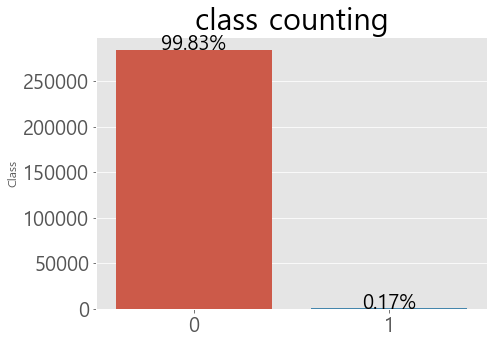

In [147]:
import numpy as np
counted_values = card['Class'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(7, 5))
plt.title('class counting', fontsize = 30)
value_bar_ax = sns.barplot(x=counted_values.index, y=counted_values)
value_bar_ax.tick_params(labelsize=20)
for i, val in enumerate(counted_values.index):    
    freq = counted_values[val]
    freq_s =  np.round((counted_values[val] / len(card)) * 100,2) 
#     print(freq_s)
    plt.text(i,freq,"%s"%freq_s+'%', horizontalalignment='center', fontsize=20)
    

### 종속변수 시각화 해석

해당 데이터 세트의 레이블인 Class 속성은 매우 불균형한 분포를 가지고 있습니다. Class는 0과 1로 분류되는데 0이 사기가 아닌 정상적인 신용카드 트랙잭션 데이터, 

1은 신용카드 사기 트랜잭션을 의미합니다. 전체 데이터의 약 0.17%만 레이블 값이 1입니다. 

레이블이 블균형한 분포를 가진 데이터 세트를 학습 시킬때는 예측 성능의 문제가 발생 할 수 있는데, 이는 이상 레이블을 가지는 데이터 건수가 정상 레이블을 가진 데이터 건수에 비해

너무 적기 때문에 발생합니다. 즉 이상 레이블을 가지는 데이터 건수는 매우 적기 때문에 제대로 다양한 유형을 학습 하지 못하는 반면에 정상 레이블을 가지는 데이터 건수는 매우 많기 때문에

일방적으로 정상 레이블로 치우친 학습을 수행해 제대로 된 이상 데이터 검출이 어려워 지기 쉽습니다. (0으로 예측하는 것에 과대적합할 가능성이 많습니다.) 

지도 학습에서 극도로 불균형한 레이블 값 분포로 인한 문제점을 해결하기 위해서는 적절한 학습 데이터를 확보하는 방안이 필요한데 , 대표적으로 오버 샘플링 및 언더 샘플링 방법이 있으며, 

오버 샘플링 방식이 예측 성능상 더 유리한 경우가 많아 주로 사용됩니다.


### 수치형 변수 데이터 시각화

In [4]:
numerical_feature = [ col for col in card.columns if card[col].dtypes != "object"]
# numerical_feature.remove('id') 
train_numeric = card[numerical_feature]
train_numeric.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


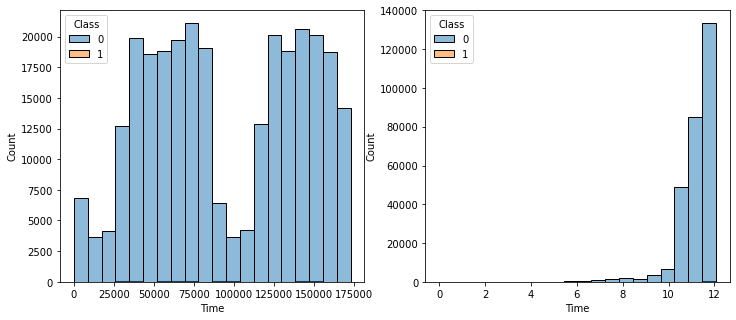

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


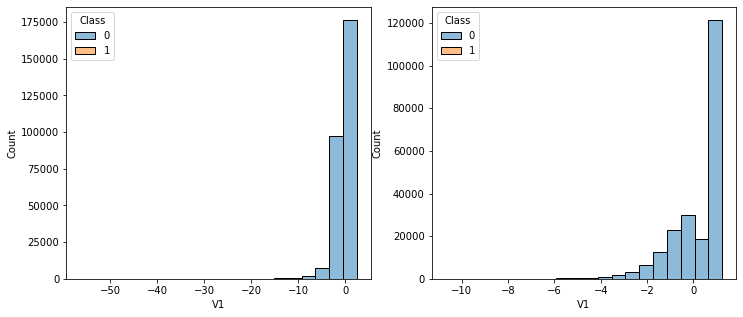

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


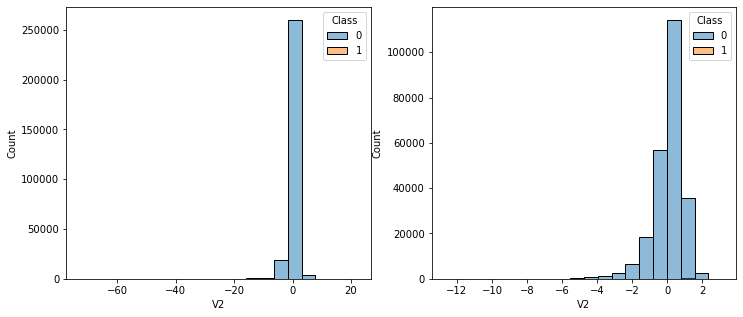

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


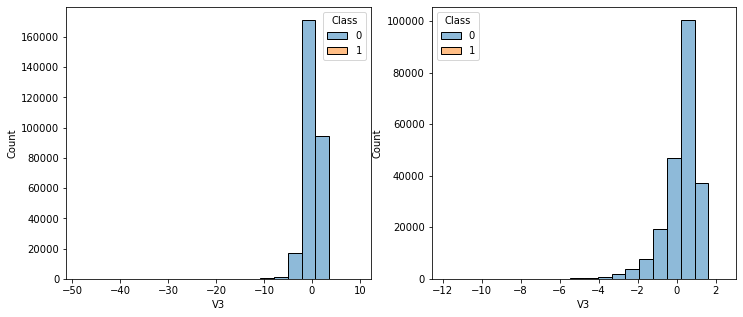

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


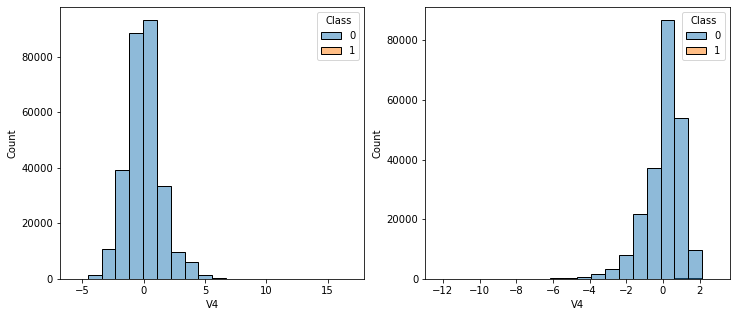

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


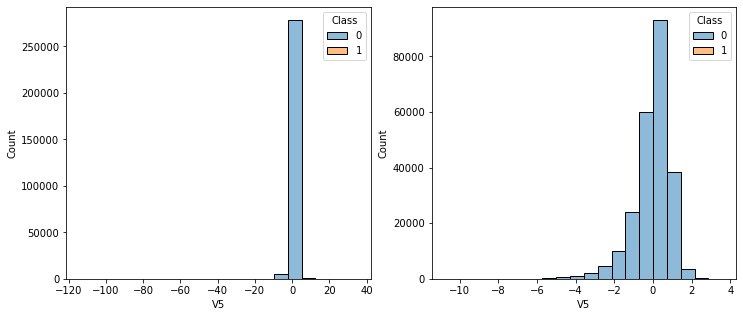

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


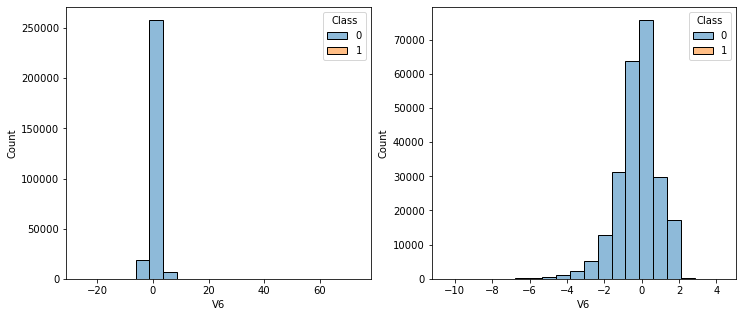

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


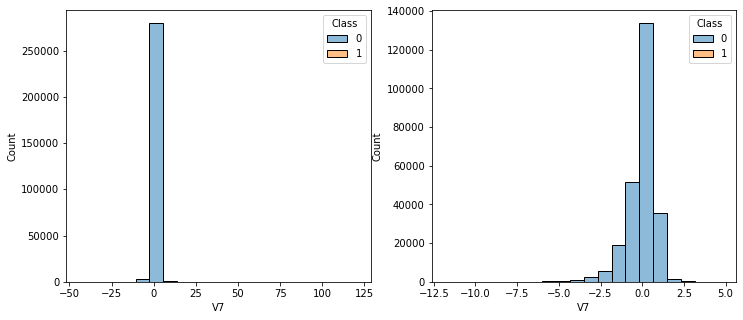

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


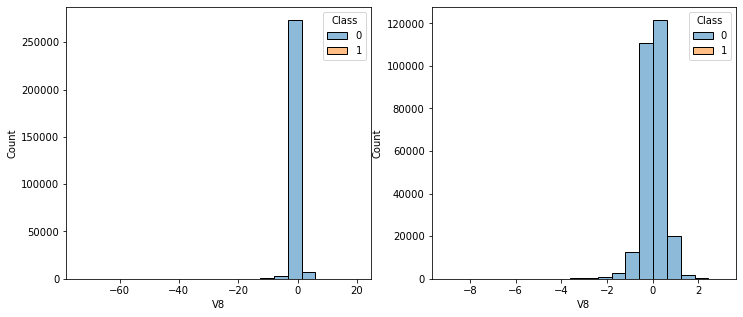

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


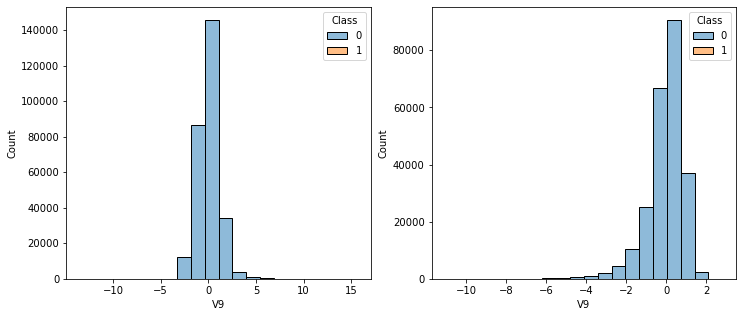

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


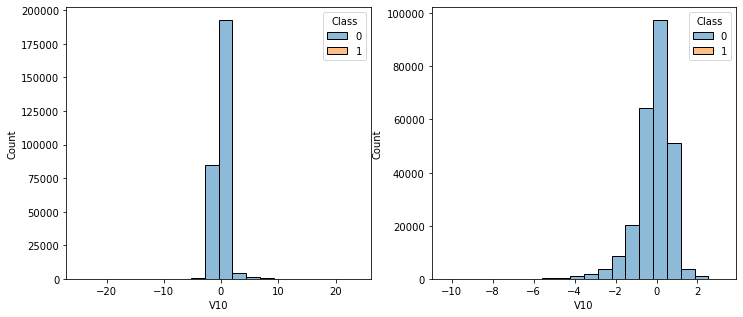

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


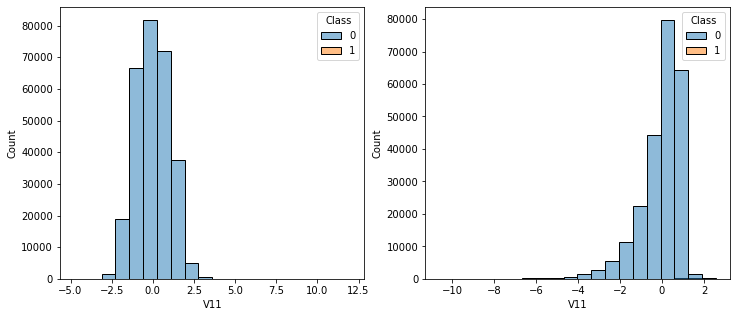

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


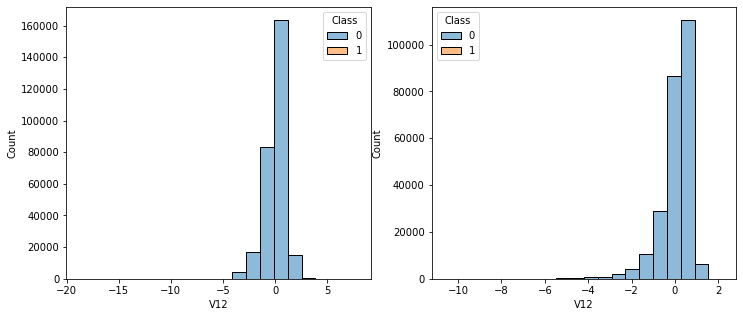

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


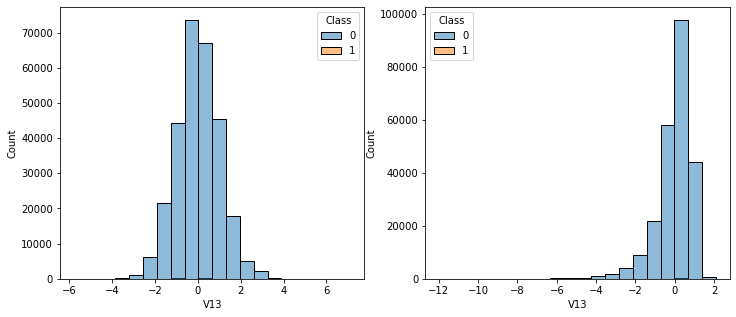

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


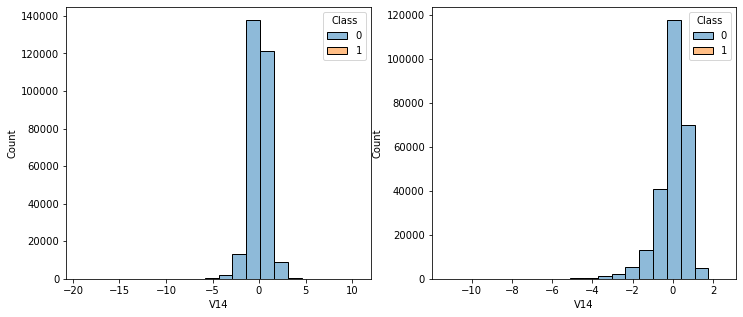

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


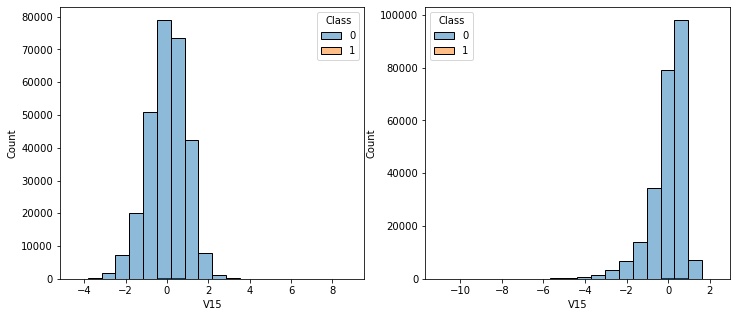

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


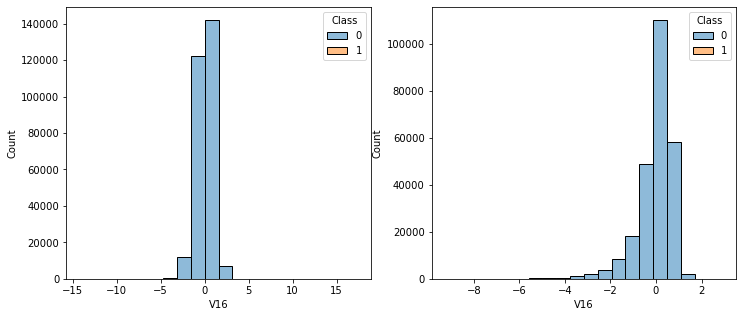

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


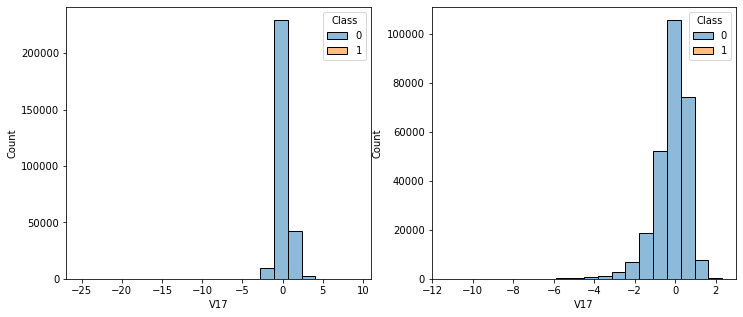

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


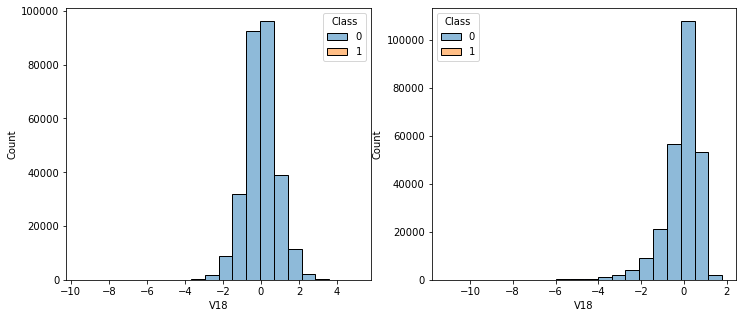

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


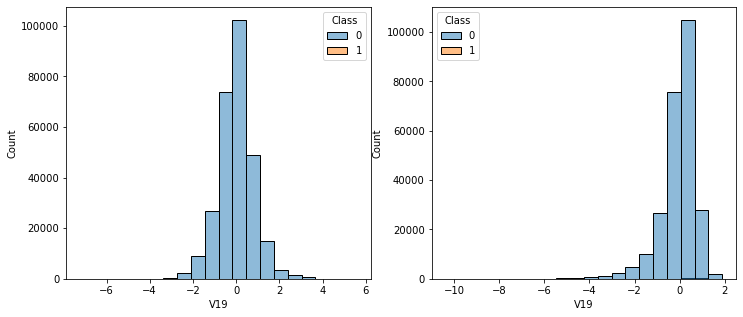

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


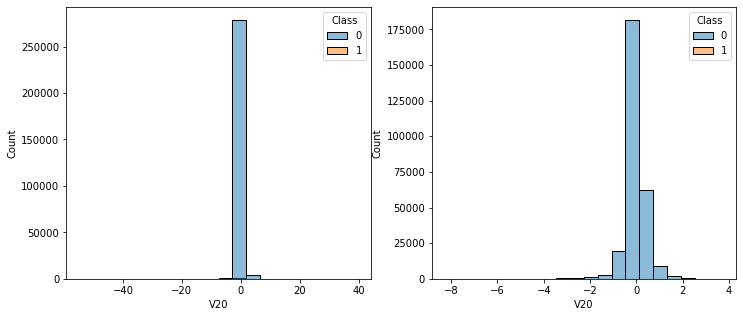

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


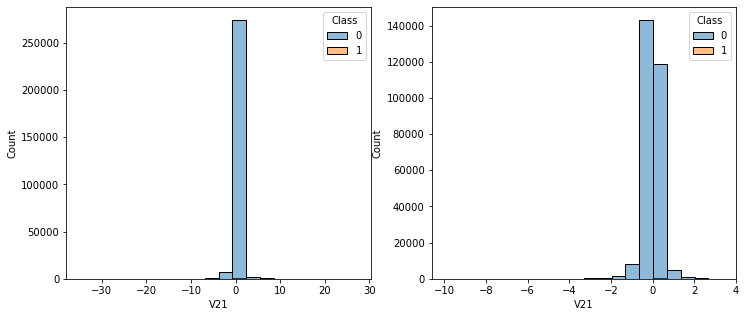

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


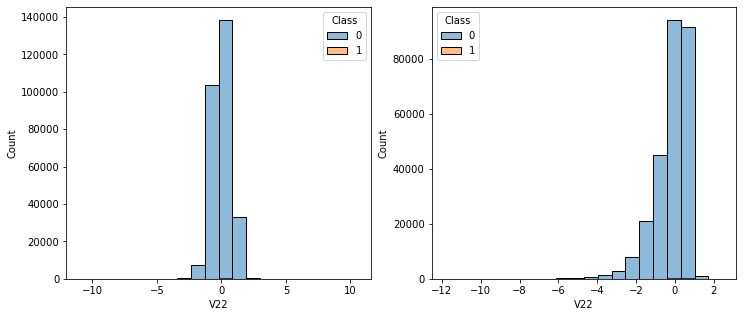

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


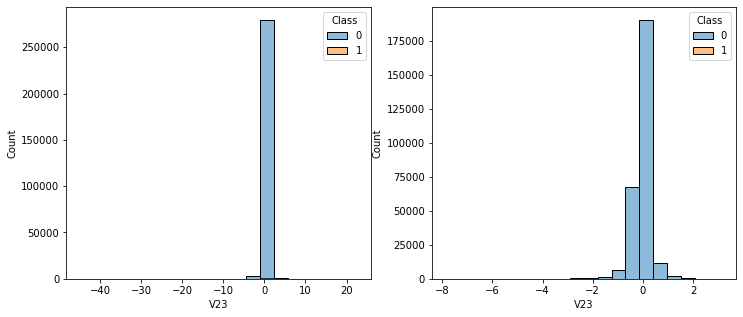

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


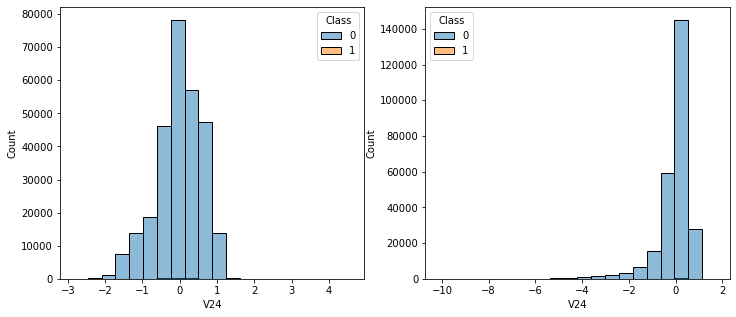

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


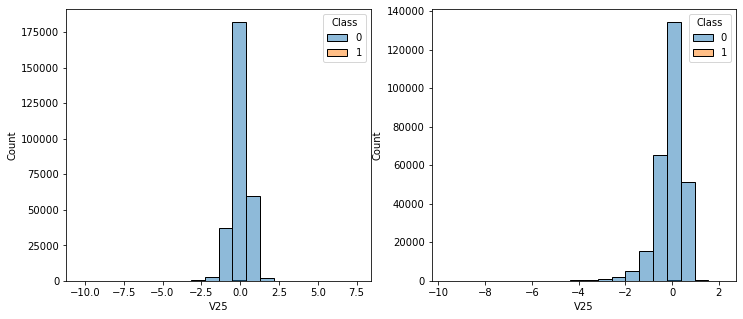

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


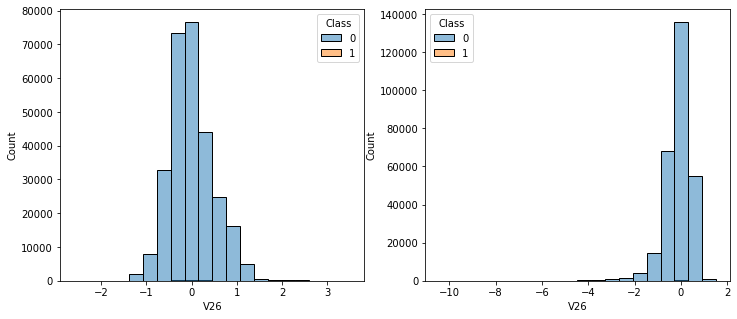

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


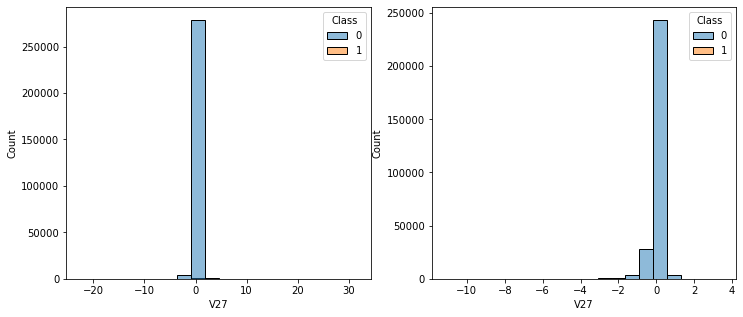

C:\Users\ParkHeungKi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


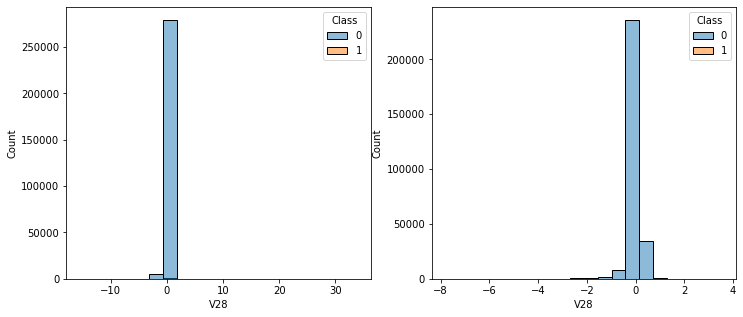

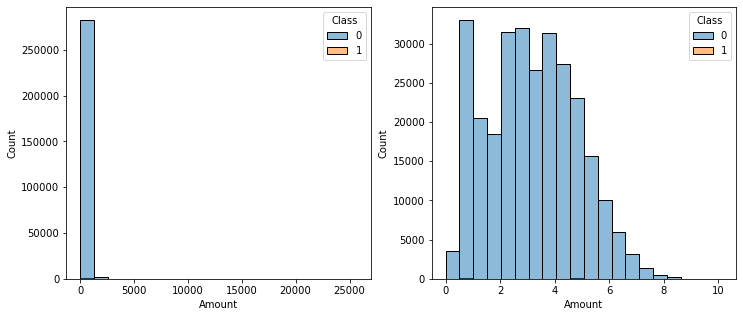

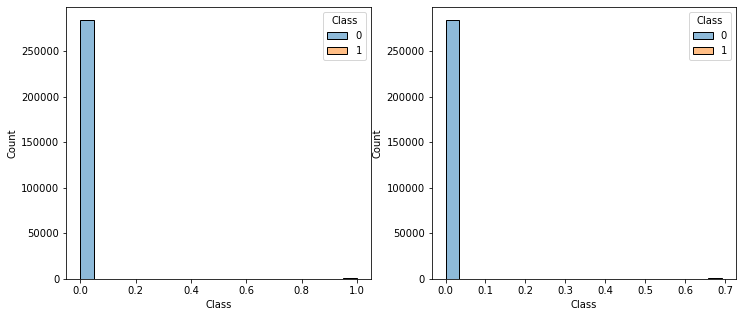

In [22]:
import seaborn as sns
import numpy as np

for i in numerical_feature:

    f, ax = plt.subplots(1,2,figsize=(12,5))
    
    sns.histplot(x=card[i],bins=20,hue=card['Class'], ax=ax[0])    
    
    sns.histplot(x=np.log1p(card[i]),bins=20,hue=card['Class'], ax=ax[1])

    plt.show()

In [5]:
train_numeric.agg(['skew','kurtosis']).T
# skewness: -2 ~ +2 사이면 왜도가 크지 않다고 판단함.
# urtosis: 첨도가 높을수록 이상치가 많아짐.

,skew,kurtosis
Time,-0.035568,-1.293530
V1,-3.280667,32.486679
V2,-4.624866,95.773106
V3,-2.240155,26.619551
V4,0.676292,2.635455
V5,-2.425901,206.904560
V6,1.826581,42.642494
V7,2.553907,405.607417
V8,-8.521944,220.586974
V9,0.554680,3.731311


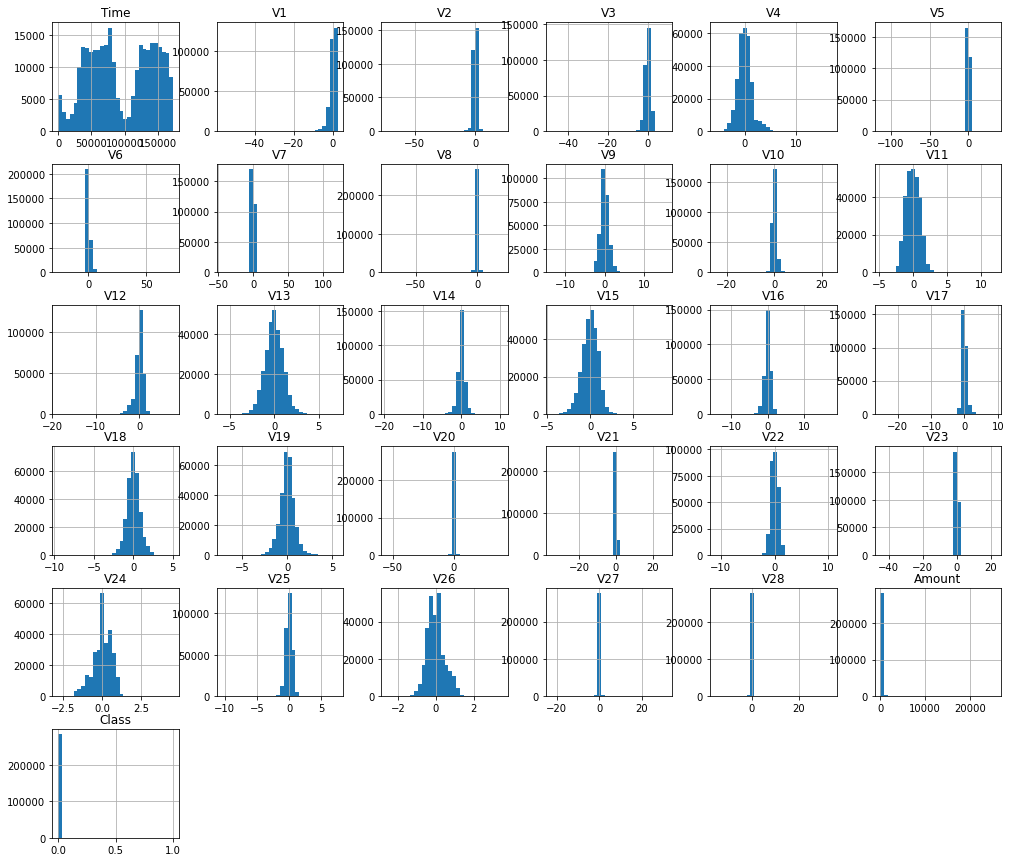

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [17, 15]
train_numeric.hist(grid=True, bins=30)
plt.show()

### 히스토그램 및 분포
- V28 , Amount 왜도가 높다


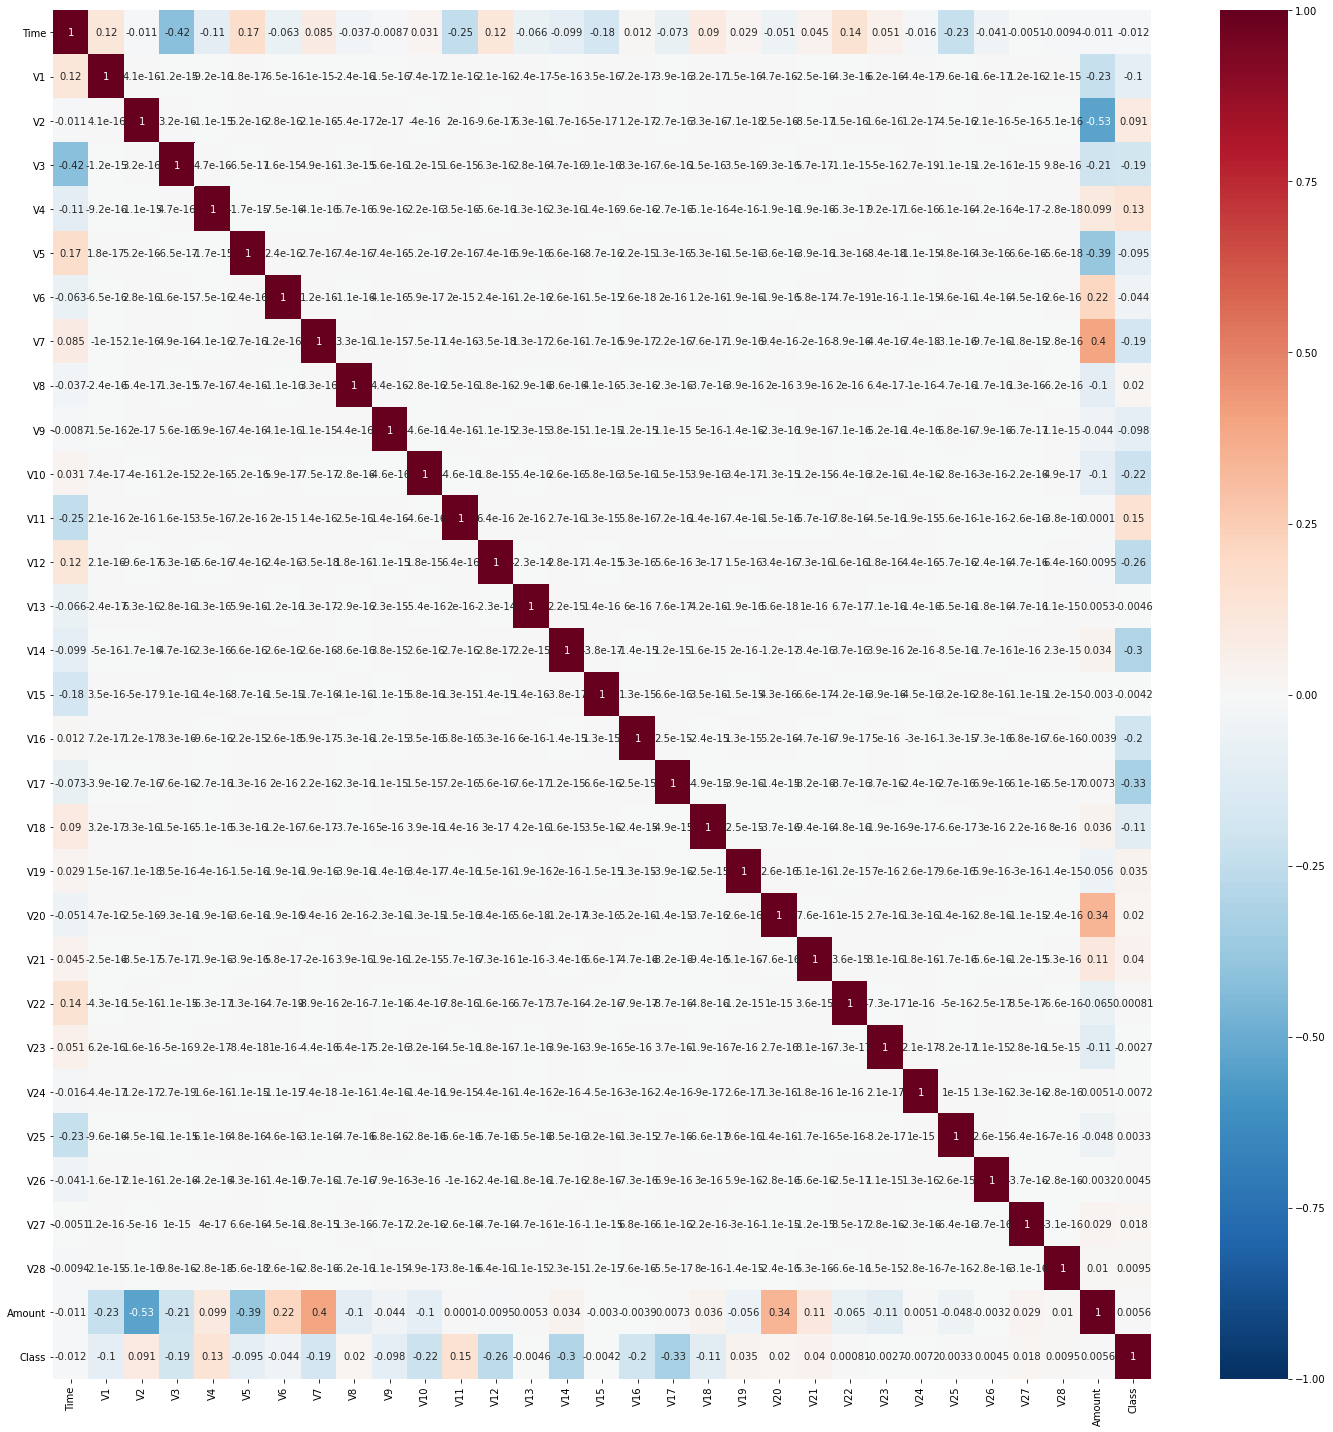

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(card.corr(method='pearson'), annot=True, cmap = 'RdBu_r', vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

### 상관 관계 분석
변수들의 상관관계가 특이점은 존재 하지 않는다

<Figure size 1440x720 with 0 Axes>

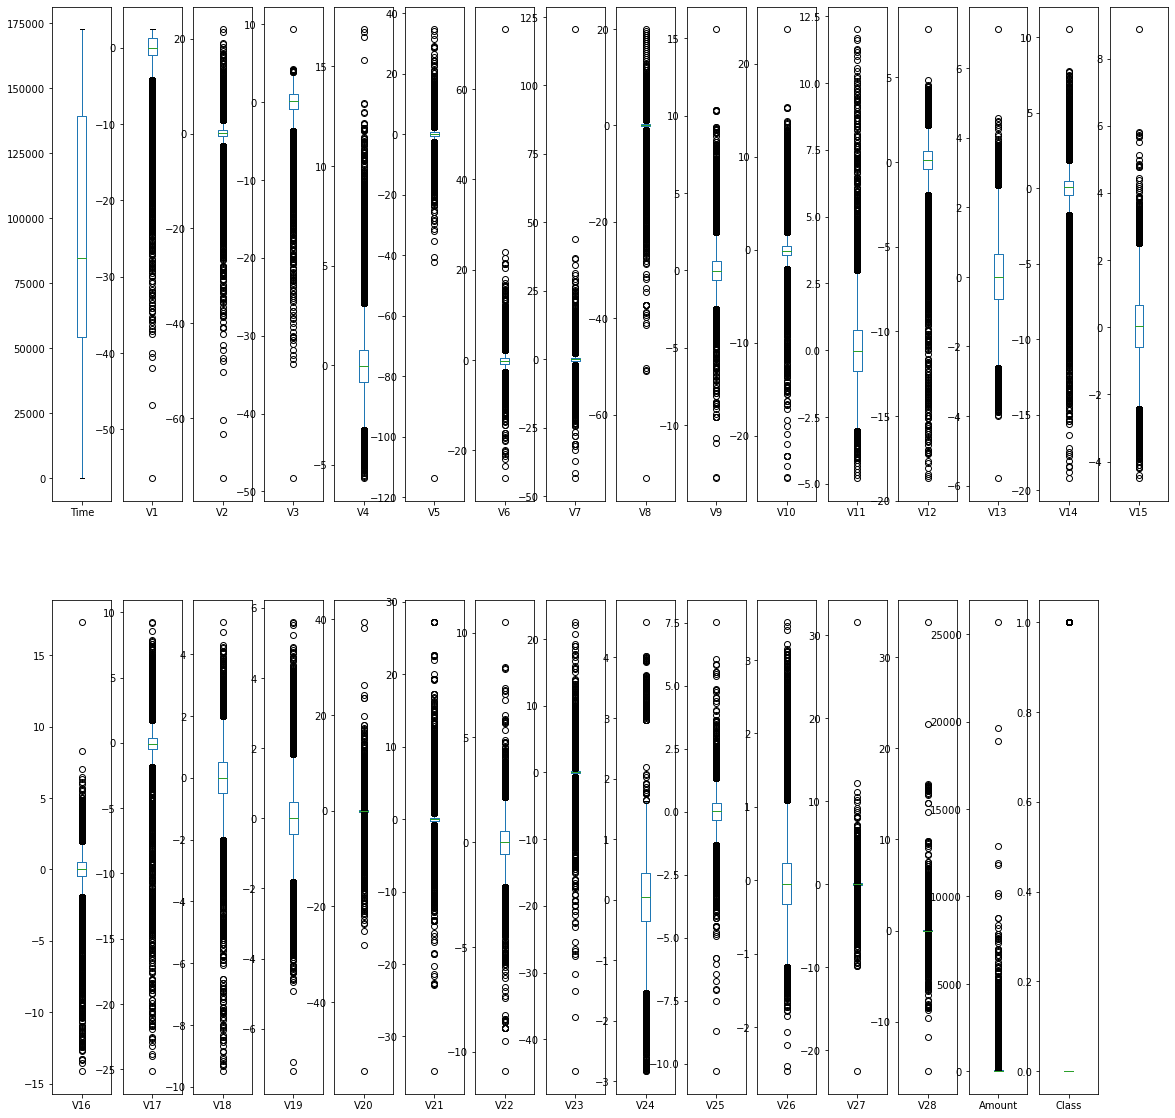

In [29]:
plt.figure(figsize=(20,10))
card.plot(kind='box', subplots=True, layout=(2,len(card.columns)//2+1), figsize=(20,20))
plt.show()

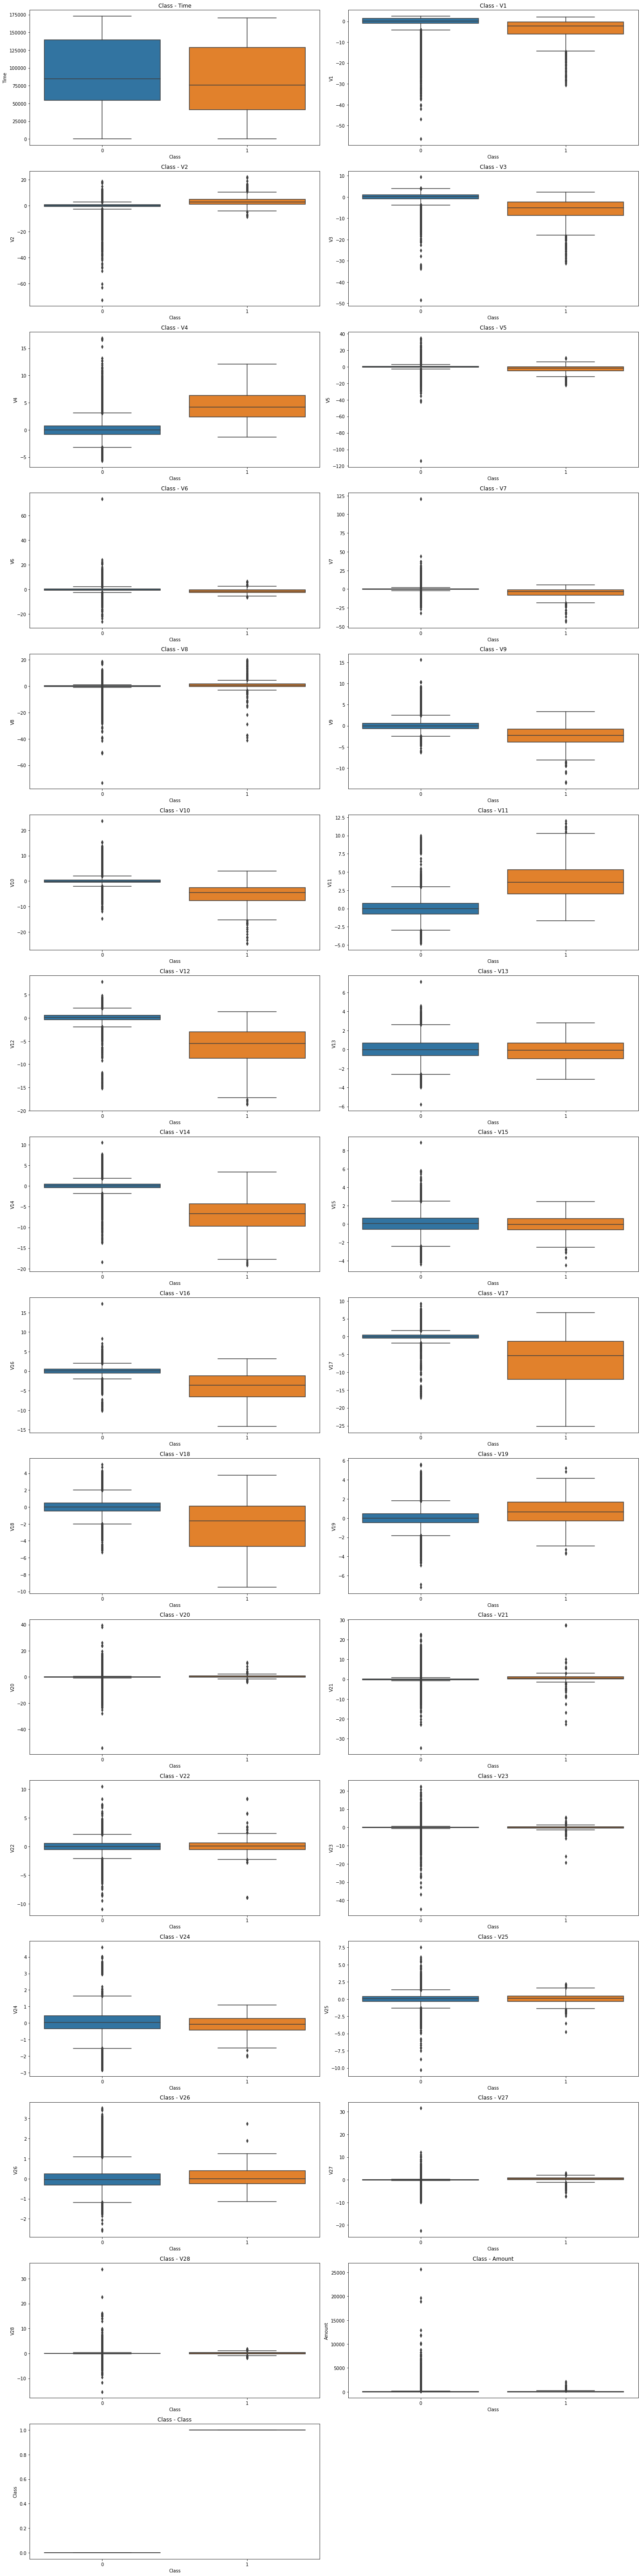

In [26]:

# train_numeric.describe()
plt.figure(figsize=(20,80))
n = 1
for col in numerical_feature:
    ax = plt.subplot(16,2,n)
    sns.boxplot(x='Class', y=col, data=train_numeric)
    plt.title("Class - {}".format(col))
    n += 1

plt.tight_layout()
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# 전처리 할것을 넣는다.
def get_preprocessed_df(df=None):
    df_copy = df.copy()  
    return df_copy

def get_train_test_dataset(df, target):
    
    df_copy = get_preprocessed_df(df)
    
    X_features = df_copy.drop(target,axis = 1)
    y_target = df_copy[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X_features,y_target, \
                        test_size=0.3, random_state=0, stratify=y_target)
    
    return X_train, X_test, y_train, y_test

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss 

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    logscore = log_loss(y_test, pred_proba)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba[:, 1])    
    print('오차 행렬')
    
    class_names= [0,1] # name  of classes     
    fig, ax =plt.subplots(figsize=(7,7))
    tick_marks = np.arange(len(class_names))    
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(confusion), annot=True , cmap= "YlGnBu" ,fmt= 'g') 
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y= 1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    
#     print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}, log_loss:{5:.4f}'.format(accuracy, precision, recall, f1, roc_auc, logscore))
    
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    import time
    start =     time. time()
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    print("---" * 30)
    print("model:", model.__class__.__name__)
    pred_proba = model.predict_proba(ftr_test)
    print("속도 : " ,time. time() -  start)
    get_clf_eval(tgt_test, pred, pred_proba)    
    print("---" * 30)
    
X_train, X_test, y_train, y_test = get_train_test_dataset(card,'Class')


오차 행렬


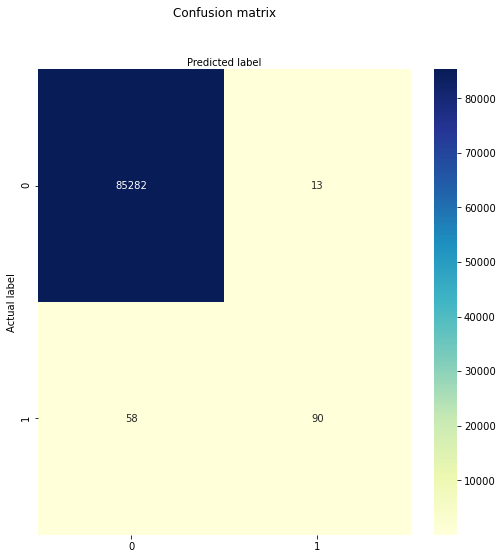

정확도: 0.9992, 정밀도: 0.8738, 재현율: 0.6081,    F1: 0.7171, AUC:0.9412, log_loss:0.0063


In [54]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)

get_clf_eval(y_test, pred, pred_proba)

------------------------------------------------------------------------------------------
model: LogisticRegression
속도 :  6.494597434997559
오차 행렬


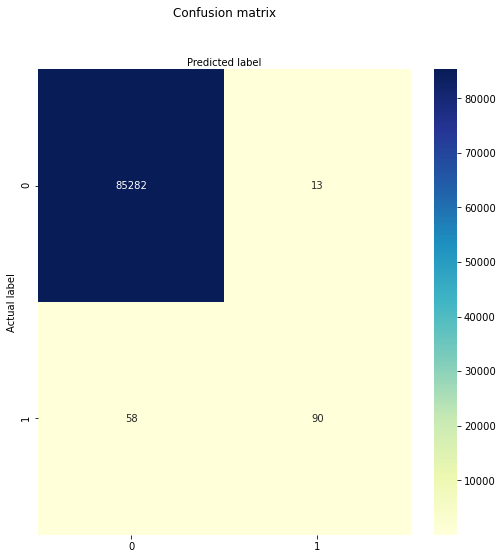

정확도: 0.9992, 정밀도: 0.8738, 재현율: 0.6081,    F1: 0.7171, AUC:0.9412, log_loss:0.0063
------------------------------------------------------------------------------------------


In [55]:
get_model_train_eval(lr,X_train,X_test,y_train,y_test)

------------------------------------------------------------------------------------------
model: RandomForestClassifier
속도 :  118.89310097694397
오차 행렬


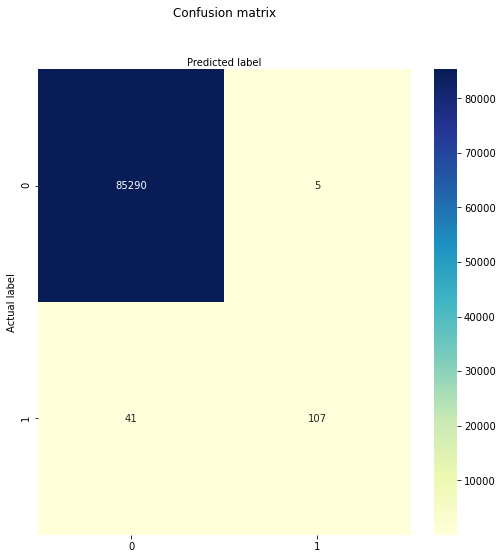

정확도: 0.9995, 정밀도: 0.9554, 재현율: 0.7230,    F1: 0.8231, AUC:0.9376, log_loss:0.0085
------------------------------------------------------------------------------------------


In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc  = RandomForestClassifier()
get_model_train_eval(rfc,X_train,X_test,y_train,y_test)

In [57]:
print("Feature importances:\n{0}".format(np.round(rfc.feature_importances_, 3)))

Feature importances:
[0.012 0.014 0.014 0.02  0.027 0.01  0.015 0.028 0.013 0.044 0.076 0.069
 0.148 0.01  0.104 0.01  0.085 0.135 0.035 0.012 0.016 0.012 0.012 0.007
 0.01  0.008 0.018 0.012 0.01  0.012]


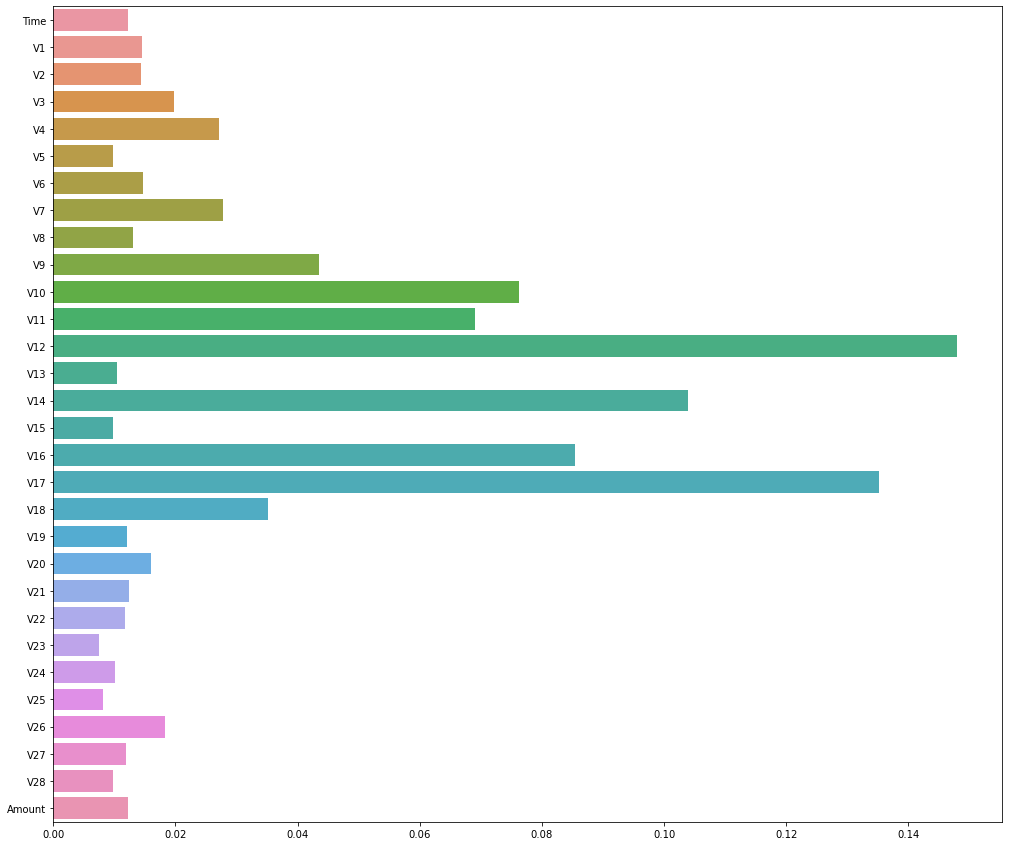

In [60]:
# feature importance를 column 별로 시각화 하기 
sns.barplot(x=rfc.feature_importances_ , y=X_train.columns)
plt.show()

In [98]:
def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [108]:
# 전처리 할것을 넣는다.
def get_preprocessed_df(df=None):
    df_copy = df.copy()      
    # 이상치 삭제
    outlier_index =  get_outlier(df_copy,'V12', weight = 1.5)
    df_copy = df_copy.drop(outlier_index, axis = 0)
    return df_copy

------------------------------------------------------------------------------------------
model: LogisticRegression
속도 :  4.3114683628082275
오차 행렬


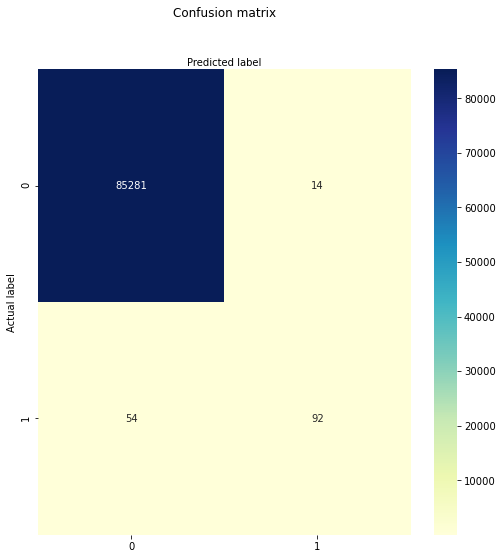

정확도: 0.9992, 정밀도: 0.8679, 재현율: 0.6301,    F1: 0.7302, AUC:0.9478, log_loss:0.0061
------------------------------------------------------------------------------------------


In [109]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card,'Class')
get_model_train_eval(lr,X_train,X_test,y_train,y_test)

### 전처리
- Amount 로그 변환
- V12 컬럼 이상치 제거
- 오버 샘플링 적용

In [110]:
# 전처리 할것을 넣는다.
def get_preprocessed_df(df=None):
    df_copy = df.copy()      
    df_copy['Amount'] = np.log1p(df_copy['Amount'])
    # 이상치 삭제
    outlier_index =  get_outlier(df_copy,'V12', weight = 1.5)
    df_copy = df_copy.drop(outlier_index, axis = 0)
    return df_copy

------------------------------------------------------------------------------------------
model: LogisticRegression
속도 :  8.008579969406128
오차 행렬


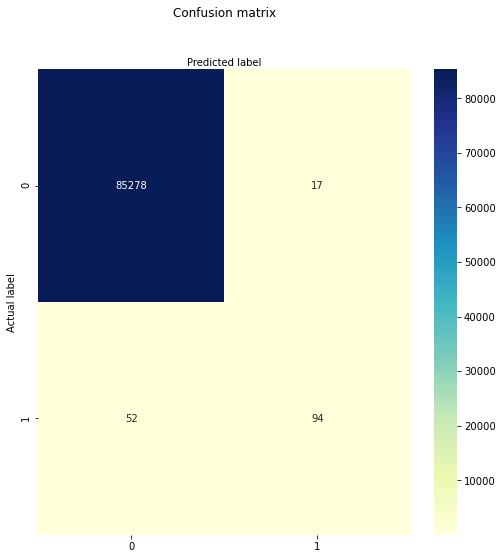

정확도: 0.9992, 정밀도: 0.8468, 재현율: 0.6438,    F1: 0.7315, AUC:0.9508, log_loss:0.0057
------------------------------------------------------------------------------------------


In [111]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card,'Class')
get_model_train_eval(lr,X_train,X_test,y_train,y_test)

In [112]:
from imblearn.over_sampling import SMOTE

def get_train_test_dataset(df, target):
    
    df_copy = get_preprocessed_df(df)
    
    X_features = df_copy.drop(target,axis = 1)
    y_target = df_copy[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X_features,y_target, \
                        test_size=0.3, random_state=0, stratify=y_target)
    
    X_train_over , y_train_over = SMOTE(random_state=0).fit_resample(X_train, y_train)
    
    return X_train_over, X_test, y_train_over, y_test

------------------------------------------------------------------------------------------
model: LogisticRegression
속도 :  2.5840582847595215
오차 행렬


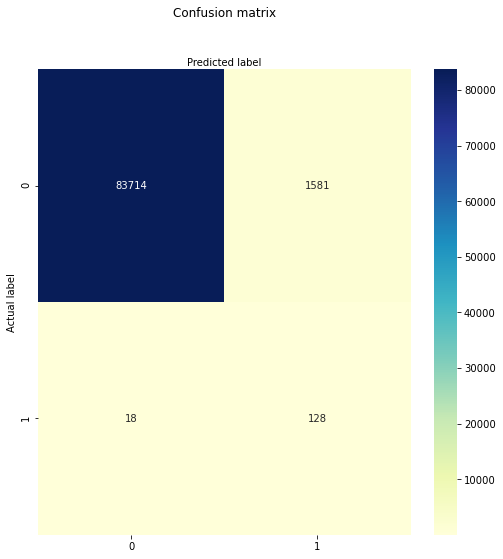

정확도: 0.9813, 정밀도: 0.0749, 재현율: 0.8767,    F1: 0.1380, AUC:0.9605, log_loss:0.0880
------------------------------------------------------------------------------------------


In [113]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card,'Class')
get_model_train_eval(lr,X_train,X_test,y_train,y_test)

### 오버샘플링 적용후 결과 해석 

로지스틱 회귀 모델의 경우 SMOTE로 오버 샘플링된 데이터로 학습할 경우 재현율이 87%로 크게 증가하였지만 반대로 정밀도가 7% 급격하게 저하되었다. 재현율이 높더라도 이정도로 저조한 정밀도로는 현실업무에 적용할수가 없다.  
이는 로지스틱 회귀 모델이 오버 샘플링으로 인해 실제 원본 데이터의 유형보다 너무나 많은 Class =1 데이터를 학습 하면서 실제 테스트 데이터 세트에서 예측을 지나치게 Class = 1로 적용해 정밀도가 급격히 떨어지게 된것이다. 분류 결정 임곗값에 따른 정밀도와 재현율 곡선을 통해서 smote로 학습된 로지스틱 회귀모델에 어떠한 문제가 발생하는지 시각적으로 확인해보자
<font size="5" color="red">재현율이 높다는것은 Class = 1 데이터를 학습 하면서 실제 테스트 데이터 세트 에서도 예측을 지나치게 Class = 1로 적용했다. </font>

<font size="5" color="red">SMOTE를 적용하면 재현율을 높아지나, 정밀도는 낮아지는것이 일반적이다. 좋은 SMOTE 패키지 일수록 재현율 증가율은 높이고 정밀도 감소율은 낮출수 있도록 효과적으로 데이터를 증식한다.</font>

In [118]:
from sklearn.metrics import precision_recall_curve
def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

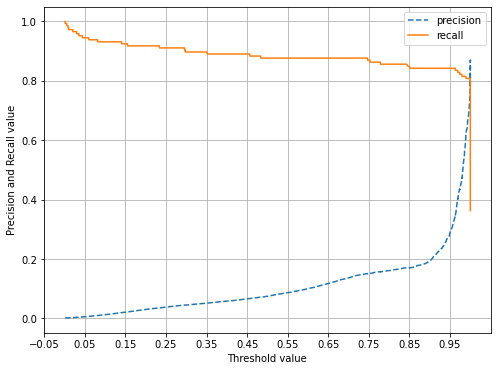

In [127]:
precision_recall_curve_plot(y_test, lr.predict_proba(X_test)[:,1])